Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

Importing Dataset

In [2]:
dataset=pd.read_csv('car performance.csv')
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


Finding missing data

In [3]:
dataset.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

There are no null characters in the columns but there is a special character '?' in the 'horsepower' column. So we we replaced '?' with nan and replaced nan values with mean of the column.

In [4]:
dataset['horsepower']=dataset['horsepower'].replace('?',np.nan)

In [5]:
dataset['horsepower'].isnull().sum()

0

In [6]:
dataset['horsepower']=dataset['horsepower'].astype('float64')

In [7]:
dataset['horsepower'].fillna((dataset['horsepower'].mean()),inplace=True)

In [8]:
dataset.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [9]:
dataset.info() #Pandas dataframe.info() function is used to get a quick overview of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [10]:
dataset.describe() #Pandas describe() is used to view some basic statistical details of a data frame or a series of numeric values.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.165829,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.298676,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


There is no use with car name attribute so drop it

In [11]:
dataset=dataset.drop('car name',axis=1) #dropping the unwanted column.

In [12]:
corr_table=dataset.corr()#Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. 
corr_table

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.777501,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.842437,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.897082,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.777501,0.842437,0.897082,1.000000,0.863990,-0.686436,-0.417081,-0.452386
weight,-0.831741,0.896017,0.932824,0.863990,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.686436,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.417081,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452386,-0.581024,0.205873,0.180662,1.000000


Data Visualizations

Heatmap : which represents correlation between attributes

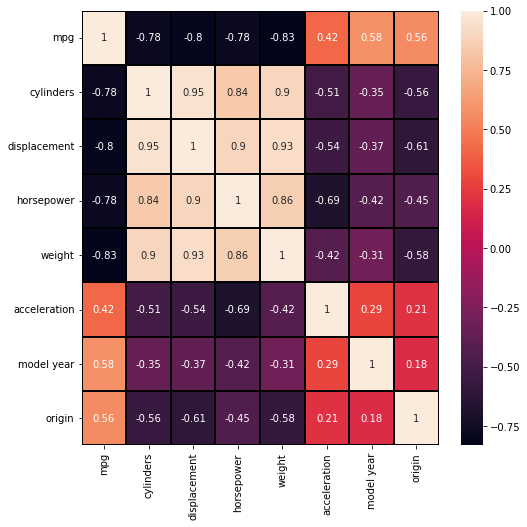

In [13]:
sns.heatmap(dataset.corr(),annot=True,linecolor ='black', linewidths = 1)#Heatmap is a way to show some sort of matrix plot,annot is used for correlation.
fig=plt.gcf()
fig.set_size_inches(8,8)

Visualizations of each attributes w.r.t rest of all attributes

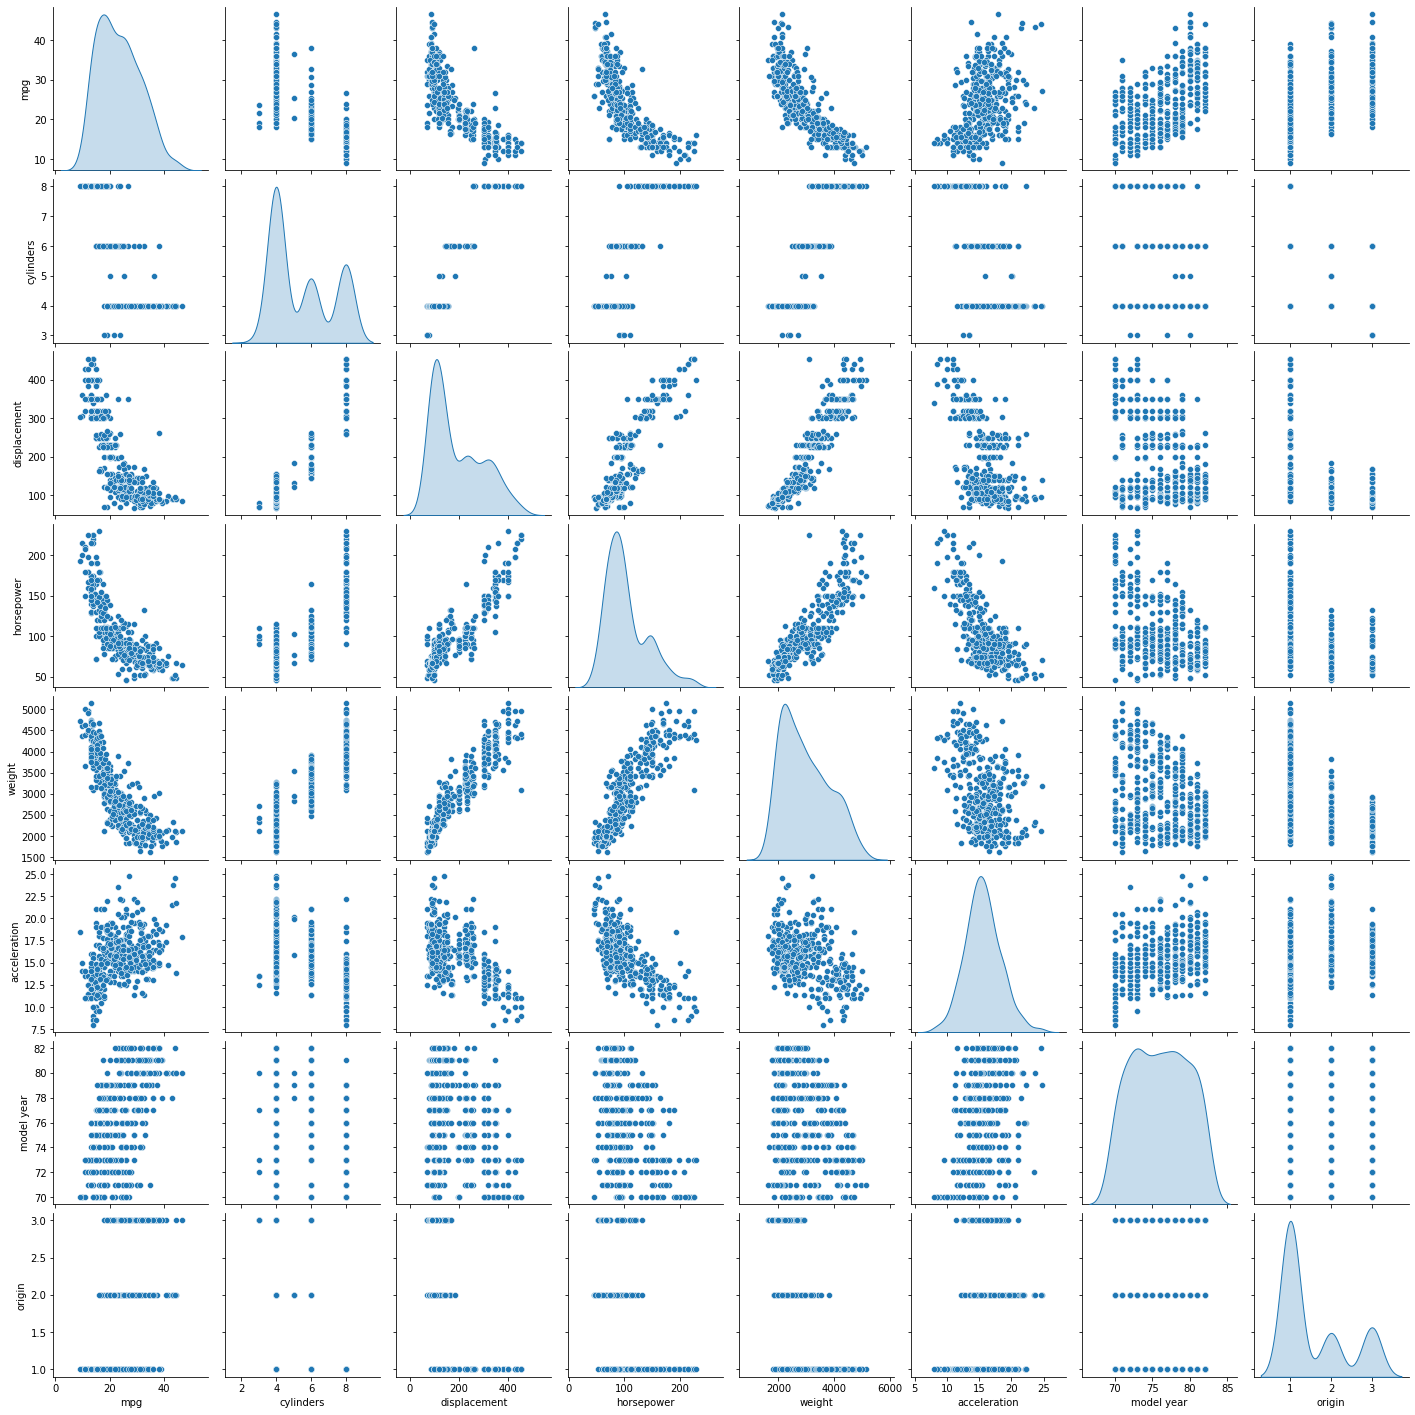

In [14]:
sns.pairplot(dataset,diag_kind='kde') #pairplot represents pairwise relation across the entire dataframe.
plt.show()

Regression plots(regplot()) creates a regression line between 2 parameters and helps to visualize their linear relationships.

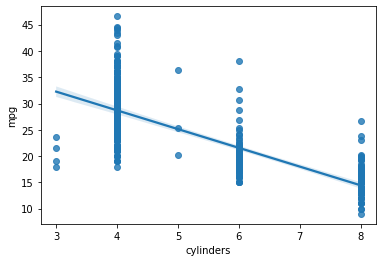

In [15]:
sns.regplot(x="cylinders", y="mpg", data=dataset)

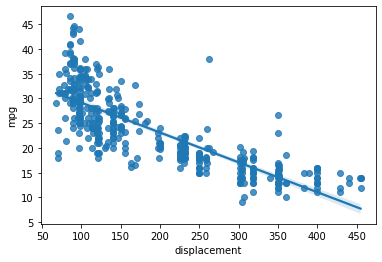

In [16]:
sns.regplot(x="displacement", y="mpg", data=dataset)

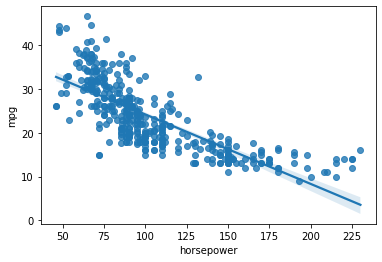

In [17]:
sns.regplot(x="horsepower", y="mpg", data=dataset)

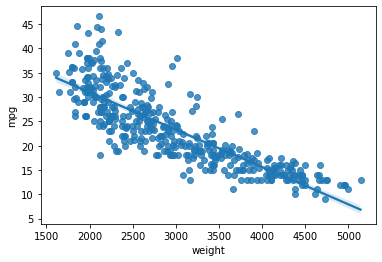

In [18]:
sns.regplot(x="weight", y="mpg", data=dataset)

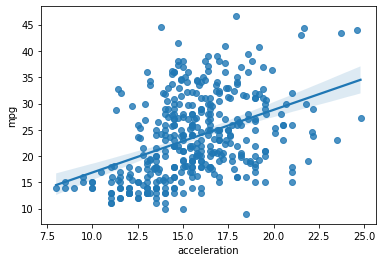

In [19]:
sns.regplot(x="acceleration", y="mpg", data=dataset)

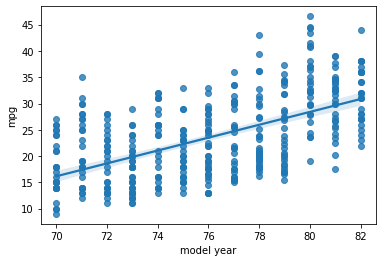

In [20]:
sns.regplot(x="model year", y="mpg", data=dataset)

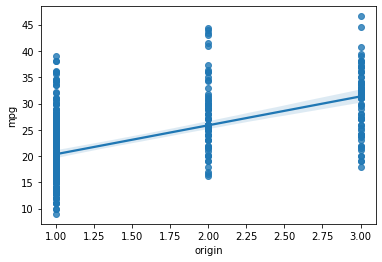

In [21]:
sns.regplot(x="origin", y="mpg", data=dataset)

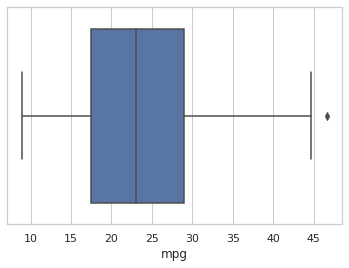

In [22]:
sns.set(style="whitegrid")
sns.boxplot(x=dataset["mpg"])

Finding quartiles for mgp

The P-value is the probability value that the correlation between these two variables is statistically significant.

Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the

p-value is < 0.001: we say there is strong evidence that the correlation is significant.
the p-value is < 0.05: there is moderate evidence that the correlation is significant.
the p-value is < 0.1: there is weak evidence that the correlation is significant.
the p-value is > 0.1: there is no evidence that the correlation is significant.

In [23]:
from scipy import stats

Cylinders vs mpg

Let's calculate the Pearson Correlation Coefficient and P-value of 'Cylinders' and 'mpg'.

In [24]:
pearson_coef, p_value = stats.pearsonr(dataset['cylinders'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.7753962854205542  with a P-value of P = 4.503992246177055e-81


Conclusion:
Since the p-value is  < 0.001, the correlation between cylinders and mpg is statistically significant, and the coefficient of ~ -0.775 shows that the relationship is negative and moderately strong.

Weght vs mpg
Let's calculate the Pearson Correlation Coefficient and P-value of 'weight' and 'mpg'.

In [25]:
pearson_coef, p_value = stats.pearsonr(dataset['weight'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.831740933244335  with a P-value of P = 2.9727995640500577e-103


Conclusion:
Since the p-value is < 0.001, the correlation between weight and mpg is statistically significant, and the linear negative relationship is quite strong (~-0.831, close to -1)

Acceleration vs mpg
Let's calculate the Pearson Correlation Coefficient and P-value of 'Acceleration' and 'mpg'.

In [26]:
pearson_coef, p_value = stats.pearsonr(dataset['acceleration'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.4202889121016507  with a P-value of P = 1.823091535078553e-18


Conclusion:
Since the p-value is > 0.1, the correlation between acceleration and mpg is statistically significant, but the linear relationship is weak (~0.420).

Model year vs mpg
Let's calculate the Pearson Correlation Coefficient and P-value of 'Model year' and 'mpg'.

In [27]:
pearson_coef, p_value = stats.pearsonr(dataset['model year'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.5792671330833096  with a P-value of P = 4.844935813365483e-37


Conclusion:
Since the p-value is < 0.001, the correlation between model year and mpg is statistically significant, but the linear relationship is only moderate (~0.579).

Origin vs mpg
Let's calculate the Pearson Correlation Coefficient and P-value of 'Origin' and 'mpg'.

In [28]:
pearson_coef, p_value = stats.pearsonr(dataset['origin'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5634503597738431  with a P-value of P = 1.0114822102336483e-34


Conclusion:
Since the p-value is < 0.001, the correlation between origin and mpg is statistically significant, but the linear relationship is only moderate (~0.563).

Ordinary Least Squares Statistics

In [29]:
test=smf.ols('mpg~cylinders+displacement+horsepower+weight+acceleration+origin',dataset).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     167.6
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          8.18e-105
Time:                        13:09:24   Log-Likelihood:                -1129.2
No. Observations:                 398   AIC:                             2272.
Df Residuals:                     391   BIC:                             2300.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       43.4941      2.690     16.171      0.000      38.206      48.782
cylinders       -0.5537      0.402     -1.377      0.169      -1.344       0.237
displacement     0.0125      0.009      1.335      0.183      -0.006       0.031
horsepower      -0.0628      0.017     -3.797      0.000      -0.095      -0.030
weight          -0.0049      0.001     -6.168      0.000      -0.006      -0.003
acceleration    -0.0402      0.121     -0.332      0.740      -0.278       0.198
origin           1.4880      0.345      4.315      0.000       0.810       2.166
==============================================================================
Omnibus:                       31.632   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.557
Skew:                           0.613   Prob(JB):                     9.46e-10
Kurtosis:                       4.002   Cond. No.                     4.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Inference as in the above summary the p value of the accelaration is maximum(i.e 0.972) so we can remove the acc variable from the dataset

Seperating into Dependent and Independent variables

Independent variables

In [30]:
x=dataset[['cylinders','displacement','horsepower','weight','model year','origin']].values
x

array([[8.000e+00, 3.070e+02, 1.300e+02, 3.504e+03, 7.000e+01, 1.000e+00],
       [8.000e+00, 3.500e+02, 1.650e+02, 3.693e+03, 7.000e+01, 1.000e+00],
       [8.000e+00, 3.180e+02, 1.500e+02, 3.436e+03, 7.000e+01, 1.000e+00],
       ...,
       [4.000e+00, 1.350e+02, 8.400e+01, 2.295e+03, 8.200e+01, 1.000e+00],
       [4.000e+00, 1.200e+02, 7.900e+01, 2.625e+03, 8.200e+01, 1.000e+00],
       [4.000e+00, 1.190e+02, 8.200e+01, 2.720e+03, 8.200e+01, 1.000e+00]])

Dependent variables

In [31]:
y=dataset.iloc[:,0:1].values
y

array([[18. ],
       [15. ],
       [18. ],
       [16. ],
       [17. ],
       [15. ],
       [14. ],
       [14. ],
       [14. ],
       [15. ],
       [15. ],
       [14. ],
       [15. ],
       [14. ],
       [24. ],
       [22. ],
       [18. ],
       [21. ],
       [27. ],
       [26. ],
       [25. ],
       [24. ],
       [25. ],
       [26. ],
       [21. ],
       [10. ],
       [10. ],
       [11. ],
       [ 9. ],
       [27. ],
       [28. ],
       [25. ],
       [25. ],
       [19. ],
       [16. ],
       [17. ],
       [19. ],
       [18. ],
       [14. ],
       [14. ],
       [14. ],
       [14. ],
       [12. ],
       [13. ],
       [13. ],
       [18. ],
       [22. ],
       [19. ],
       [18. ],
       [23. ],
       [28. ],
       [30. ],
       [30. ],
       [31. ],
       [35. ],
       [27. ],
       [26. ],
       [24. ],
       [25. ],
       [23. ],
       [20. ],
       [21. ],
       [13. ],
       [14. ],
       [15. ],
       [14. ],
       [17

Splitting into train and test data.

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

we are splitting as 90% train data and 10% test data

decision tree regressor

In [34]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=0,criterion="mae")
dt.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mae', random_state=0)

In [35]:
import pickle
pickle.dump(dt,open('decision_model.pkl','wb'))

In [36]:
y_pred=dt.predict(x_test)
y_pred

array([13. , 26.5, 16. , 19. , 19. , 31. , 37. , 22. , 17. , 26.8, 39. ,
       31.8, 16. , 26. , 15.5, 34.3, 27. , 27. , 16.5, 31.5, 16. , 23. ,
       23. , 19. , 34.2, 24.2, 36.1, 36. , 34.3, 18.5, 19.2, 23.7, 15. ,
       32. , 25. , 23. , 22.5, 16. , 31.5, 12. ])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


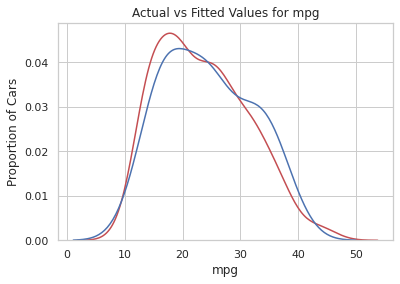

In [39]:
ax1 = sns.distplot(dataset['mpg'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for mpg')
plt.xlabel('mpg')
plt.ylabel('Proportion of Cars')
 
plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

R-squared

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

R-squared = Explained variation / Total variation

Mean Squared Error (MSE)

The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).

In [40]:
from sklearn.metrics import r2_score,mean_squared_error

In [41]:
r2_score(y_test,y_pred)

0.8577931296398441

In [42]:
mean_squared_error(y_test,y_pred)

9.829249999999998

In [43]:
np.sqrt(mean_squared_error(y_test,y_pred))

3.1351634726119144

random forest regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
rf= RandomForestRegressor(n_estimators=10,random_state=0,criterion='mae')
rf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mae', n_estimators=10, random_state=0)

In [46]:
y_pred2=rf.predict(x_test)
y_pred2

array([14.25, 26.3 , 13.4 , 22.1 , 18.3 , 30.9 , 34.41, 24.85, 15.4 ,
       25.29, 37.36, 38.61, 17.7 , 24.5 , 16.2 , 31.42, 29.07, 27.32,
       16.82, 32.47, 16.05, 25.5 , 24.15, 20.2 , 32.4 , 25.58, 32.63,
       31.97, 30.25, 16.37, 18.6 , 29.56, 17.97, 31.1 , 21.41, 24.15,
       19.9 , 16.3 , 33.17, 11.9 ])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


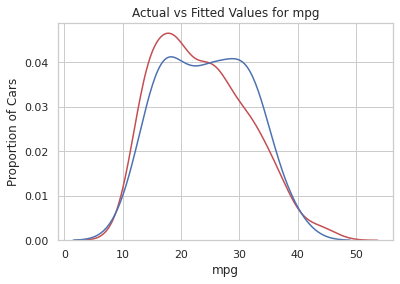

In [47]:
ax1 = sns.distplot(dataset['mpg'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred2, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for mpg')
plt.xlabel('mpg')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

In [48]:
from sklearn.metrics import r2_score,mean_squared_error

In [49]:
r2_score(y_test,y_pred2)

0.921450931811811

In [50]:
mean_squared_error(y_test,y_pred2)

5.429262500000002

In [51]:
np.sqrt(mean_squared_error(y_test,y_pred2))

2.330077788401066

linear regression

In [53]:
from sklearn.linear_model import LinearRegression
mr=LinearRegression()
mr.fit(x_train,y_train)

LinearRegression()

In [54]:
y_pred3=mr.predict(x_test)
y_pred3

array([[13.2162321 ],
       [24.27285307],
       [11.61772023],
       [20.96641686],
       [17.7358037 ],
       [29.45346926],
       [33.47436298],
       [23.17018367],
       [15.07249948],
       [26.7641345 ],
       [33.42858873],
       [33.93286841],
       [21.50648727],
       [25.81726693],
       [16.3148492 ],
       [30.58507574],
       [28.32755483],
       [28.65569292],
       [17.66424885],
       [31.01488248],
       [15.53264908],
       [24.60373733],
       [26.90214044],
       [20.49512288],
       [29.63732336],
       [28.47040955],
       [30.97812573],
       [29.93363565],
       [29.87143269],
       [18.08117895],
       [20.35120121],
       [31.31836429],
       [20.99073903],
       [32.03819055],
       [23.85718455],
       [26.30866396],
       [21.38233768],
       [16.80219962],
       [32.13262515],
       [ 9.27349071]])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


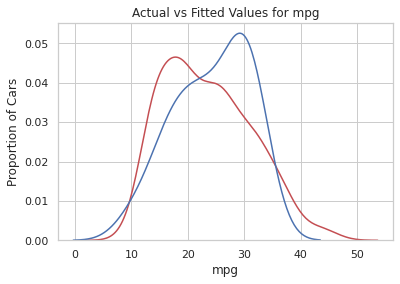

In [55]:
ax1 = sns.distplot(dataset['mpg'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred3, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for mpg')
plt.xlabel('mpg')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are not as close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

In [56]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred3)

0.8519031381502012

In [57]:
mean_squared_error(y_test,y_pred3)

10.236362530519434

In [58]:
np.sqrt(mean_squared_error(y_test,y_pred3))

3.199431594911733

Conclusion:

When comparing models, the model with the higher R-squared value is a better fit for the data.

When comparing models, the model with the smallest MSE value is a better fit for the data.

Comparing these three models, we conclude that the DecisionTree model is the best model to be able to predict mpg from our dataset.